## Question 1:
> Perceptron

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from utli_functions import create_data_from_file

In [35]:
X, y = create_data_from_file(file_name='two_circle.txt')

# print y
y

array([-1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
        1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1])

In [30]:
class Perceptron(object):
    def __init__(self):
        self.errors_ = None
        self.learning_rate = 0.1
        self.weights = None
        self.bias = 0.1
        self.n_iter = 100
    def net_input(self, X):
        z = np.dot(X, self.weights[:]) + self.bias
        return z

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

    def fit(self, X, y):
        rgen = np.random.RandomState(1)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.bias=self.weights[0]
        self.weights=self.weights[1:]
        self.errors_ = []
        for _ in range(self.n_iter): #Repeat training data for the number of trainings
            output = self.predict(X)
            errors = y - output
            self.weights[:] += self.learning_rate * X.T.dot(errors)
            # Weight w_Update 0
            self.bias += self.learning_rate*errors
            
            # Calculation of cost function
            cost = Perceptron.MSE(y,output)

            # cost storage
            self.errors_.append(cost)
        return self

    @staticmethod
    def MSE(real, output):
        return ((np.array(real) - np.array(output))**2).mean()

    @staticmethod
    def accuracy(real, output):
        count = t != np.sign(test_label)
        return np.sum(count)/len(real)

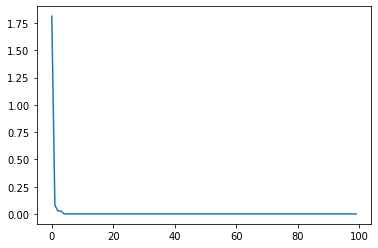

In [31]:
per_model=Perceptron()
per_model.fit(x,y)
plt.plot(per_model.errors_)
plt.show()

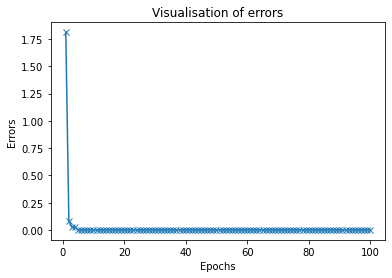

In [32]:
plt.plot(range(1, len(per_model.errors_) + 1), per_model.errors_, marker = 'x')
plt.title("Visualisation of errors")
plt.xlabel('Epochs')
plt.ylabel('Errors')
plt.show()

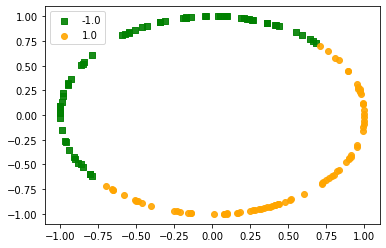

In [34]:
plot_labels(x,per_model)